In [4]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [5]:
tickers = ['PG','MSFT','F','GE']
mydata = pd.DataFrame()
for t in tickers:
	mydata[t]= wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6431 entries, 1995-01-03 to 2020-07-17
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6431 non-null   float64
 1   MSFT    6431 non-null   float64
 2   F       6431 non-null   float64
 3   GE      6431 non-null   float64
dtypes: float64(4)
memory usage: 251.2 KB


In [7]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.320252,2.406834,3.262354,2.725145
1995-01-04,6.269589,2.424330,3.350130,2.725145
1995-01-05,6.180927,2.384342,3.320871,2.731823
1995-01-06,6.193593,2.424330,3.320871,2.718464
1995-01-09,6.168259,2.409335,3.379390,2.691748


In [8]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2020-07-13,124.050003,207.070007,6.06,6.70
2020-07-14,125.089996,208.350006,6.36,6.88
2020-07-15,124.500000,208.039993,6.74,7.14
2020-07-16,124.760002,203.919998,6.86,7.05
2020-07-17,125.629997,202.880005,6.80,7.07


In [9]:
#This formula help us to get data to 100. (pt/p0)*100
mydata.iloc[0] # Extract data from the 1st [0] column of the table

PG      6.320252
MSFT    2.406834
F       3.262354
GE      2.725145
Name: 1995-01-03 00:00:00, dtype: float64

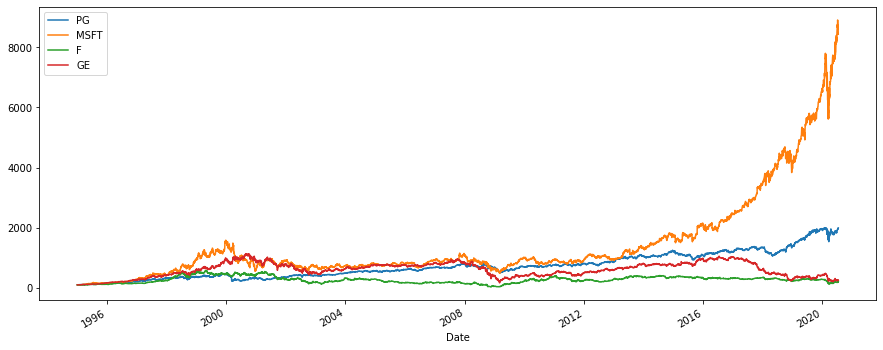

In [10]:
#(p(0)/p(0))=1. If 1 *100 = 100
(mydata/ mydata.iloc[0]*100).plot(figsize = (15, 6));
plt.show()


In [11]:
#compare the behaviour of the 4 different stocks as if they all starting the same value of 100.
#If we dont do this, will display all Adj price of all compnay ploted directly, and will not have a good starting point landmark.
#Normalisation slove this issue.

In [12]:
mydata.loc ['1995-01-03'] #.loc indicate the precise lable coressponding to the 1st roll. Cause the date are lables, and thats the requirement to use .loc

PG      6.320252
MSFT    2.406834
F       3.262354
GE      2.725145
Name: 1995-01-03 00:00:00, dtype: float64

In [13]:
mydata.iloc [0]	
#when using .iloc[0] need to locate a position of interest, given we are interested in the 1st row.
#advantage shorter to type and more intutitve to use, and clearly refer to the 1st register trading price

PG      6.320252
MSFT    2.406834
F       3.262354
GE      2.725145
Name: 1995-01-03 00:00:00, dtype: float64

In [15]:
returns = (mydata/mydata.shift(1))-1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008734,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017622,-0.009828


In [16]:
weights = np.array([0.25,0.25,0.25,0.25])

In [21]:
np.dot(returns, weights) #np.dot() - calculates vector or matrix products. 
#the output: dot product
# did not get a single number because of matrix X matrix and output as array.

array([        nan,  0.00653977, -0.00922981, ...,  0.02283363,
       -0.00312907, -0.00100903])

In [22]:
annual_returns = returns.mean() *250
annual_returns
#if 1st obatain the mean of return and (1 by 4) * (4 by 1) will obatin a single number

PG      0.142173
MSFT    0.222459
F       0.108668
GE      0.087786
dtype: float64

In [23]:
np.dot(annual_returns,weights)

0.1402713971550587

In [29]:
#storge as % , 3 value digit after decemal point 
pfolio_1=str(round(np.dot(annual_returns, weights), 5) *100) + '%'
print (pfolio_1)

14.027000000000001%


In [30]:
weights_2 = np.array([0.4,0.4,0.15,0.05])

In [32]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2),5)*100)+ ' %'
print (pfolio_1)
print (pfolio_2)


14.027000000000001%
16.654 %
